# Project: Predicting House Prices

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [16]:
# Load the dataset
data = pd.read_csv('housing.csv')


In [17]:
# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Split the data into features and target variable
X = data.drop('median_house_value', axis=1).astype(float)
y = data['median_house_value'].astype(float)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


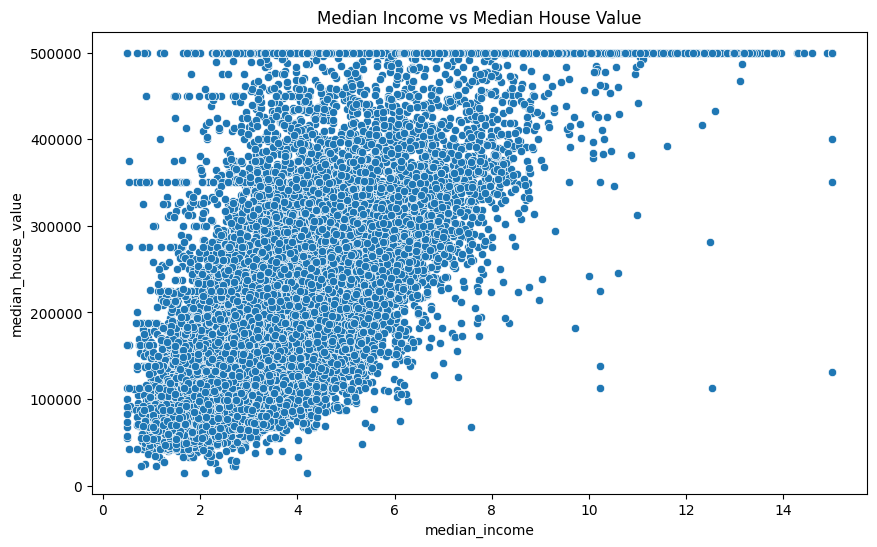

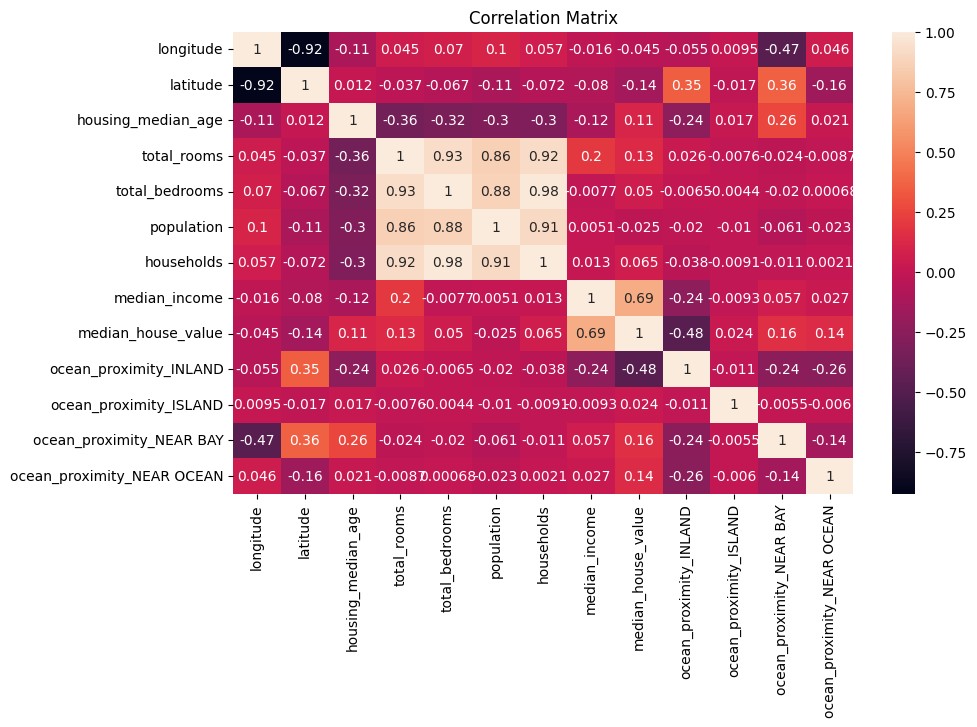

In [18]:
# Visualize the relationships between different features and house prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median Income vs Median House Value')
plt.show()

# Analyze the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [19]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 4802173538.604191
R-squared: 0.648840215443197


In [21]:
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for i in range(iterations):
        prediction = np.dot(X, theta)
        error = prediction - y
        gradient = (1/m) * np.dot(X.T, error)
        theta -= learning_rate * gradient
        cost = np.sum(error ** 2) / (2 * m)
        cost_history.append(cost)
    return theta, cost_history

# Add bias term and implement gradient descent
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias term
theta, cost_history = gradient_descent(X_b, y_train.values, learning_rate=0.01, iterations=1000)

print(f'Theta (parameters): {theta}')


Theta (parameters): [nan nan nan nan nan nan nan nan nan nan nan nan nan]


C:\Users\khush\AppData\Local\Temp\ipykernel_32408\1682882452.py:10: RuntimeWarning: overflow encountered in square
  cost = np.sum(error ** 2) / (2 * m)
C:\Users\khush\AppData\Local\Temp\ipykernel_32408\1682882452.py:9: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


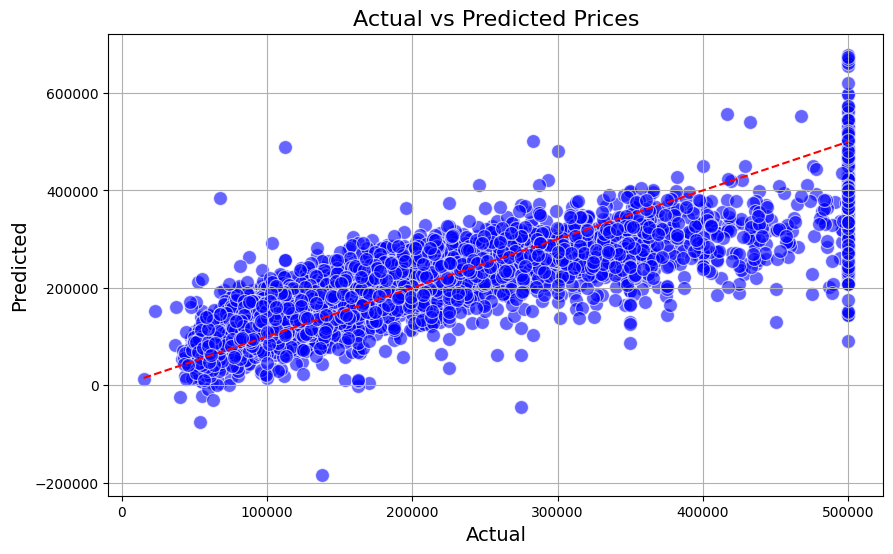

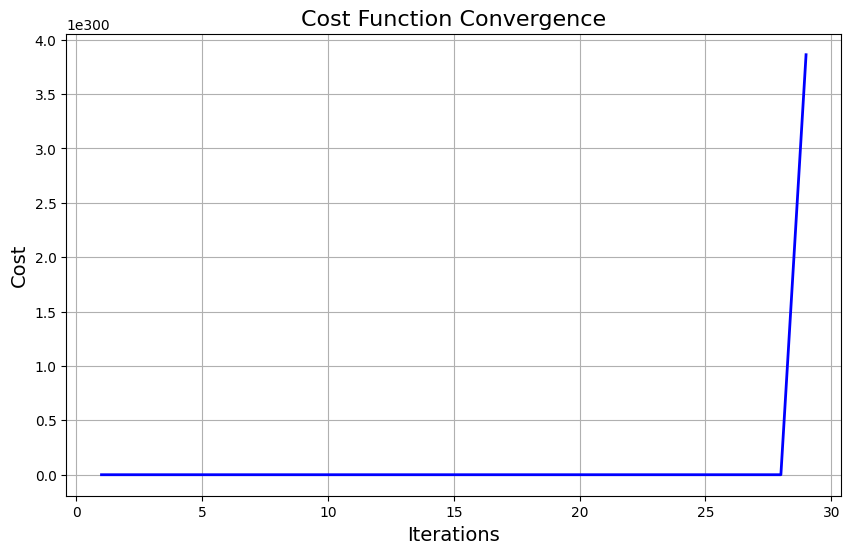

In [22]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, marker='o', s=100, color='b', edgecolor='w', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Actual vs Predicted Prices', fontsize=16)
plt.grid(True)
plt.show()

# Enhanced Plot for Cost Function Convergence
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cost_history) + 1), cost_history, 'b-', linewidth=2)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.title('Cost Function Convergence', fontsize=16)
plt.grid(True)
plt.show()
